In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [2]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D

In [3]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [4]:
print(tf.__version__)

2.0.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [7]:
data = pd.read_csv('./datasets/Movies-Poster/train.csv')
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
    path = './datasets/Movies-Poster/Images/' + data['Id'][i] + '.jpg'
    img = image.load_img(path, target_size=(img_width, img_height, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [00:33<00:00, 214.72it/s]


In [9]:
X.shape

(7254, 350, 350, 3)

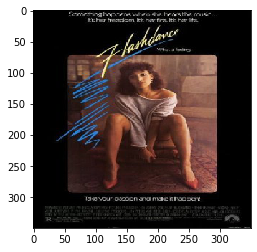

In [10]:
plt.imshow(X[1])

In [11]:
y = data.drop(['Id', 'Genre'], axis=1)
y = y.to_numpy()
y.shape

(7254, 25)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)

In [13]:
X_train[0].shape

(350, 350, 3)

## Build CNN

In [18]:
model = Sequential()
model.add(Conv2D(
    filters=16, 
    kernel_size=(3,3),
    activation='relu',
    input_shape=(X_train[0].shape)
))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(
    filters=32, 
    kernel_size=(3,3),
    activation='relu',
))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization_9 (Batch (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 174, 174, 16)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_10 (Batc (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 86, 86, 32)       

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
6165/6165 [==============================] - 537s 87ms/sample - loss: 0.5403 - accuracy: 0.7413 - val_loss: 0.3244 - val_accuracy: 0.9069
Epoch 2/5
6165/6165 [==============================] - 496s 81ms/sample - loss: 0.2565 - accuracy: 0.9097 - val_loss: 0.3447 - val_accuracy: 0.8839
Epoch 3/5
6165/6165 [==============================] - 491s 80ms/sample - loss: 0.2407 - accuracy: 0.9127 - val_loss: 0.2687 - val_accuracy: 0.9068
Epoch 4/5
6165/6165 [==============================] - 480s 78ms/sample - loss: 0.2346 - accuracy: 0.9138 - val_loss: 0.9481 - val_accuracy: 0.8879
Epoch 5/5
6165/6165 [==============================] - 541s 88ms/sample - loss: 0.2299 - accuracy: 0.9147 - val_loss: 0.2874 - val_accuracy: 0.9026


In [22]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

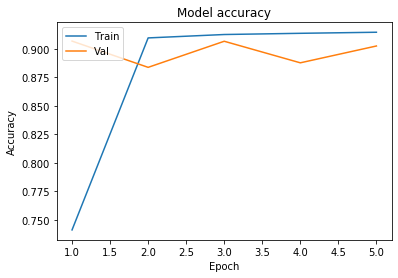

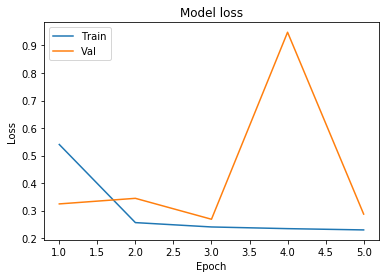

In [23]:
plot_learningCurve(history, 5)

## Testing of Model